Kaggle Competition to Predict Housing Prices
=============

Data set Downloaded from https://www.kaggle.com/c/house-prices-advanced-regression-techniques
------------

I will build a model using pandas dataframes and scikit learn to predict housing prices for the given a data set. The trained model will be used to predict the prices for the test set and this will be submitted to kaggle. 


In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

First load the data from train.csv.

In [2]:
type_dict = {'MSSubClass':np.dtype('S') , 
             'MSZoning':np.dtype('S'),
             'Street':np.dtype('S'),
             'Alley':np.dtype('S'),
             'LotShape':np.dtype('S'),
             'LandContour':np.dtype('S'),
        'Utilities':np.dtype('S'),
        'LotConfig':np.dtype('S'),
        'LandSlope':np.dtype('S'),
        'Neighborhood':np.dtype('S'),
        'Condition1':np.dtype('S'),
        'Condition2':np.dtype('S'),
        'BldgType':np.dtype('S'),
        'HouseStyle':np.dtype('S'),
        'RoofStyle':np.dtype('S'),
        'RoofMatl':np.dtype('S'),
        'Exterior1st':np.dtype('S'),
        'Exterior2nd':np.dtype('S'),
        'MasVnrType':np.dtype('S'),
        'ExterQual':np.dtype('S'),
        'ExterCond':np.dtype('S'),
        'Foundation':np.dtype('S'),
        'BsmtQual':np.dtype('S'),
        'BsmtCond':np.dtype('S'),
        'BsmtExposure':np.dtype('S'),
        'BsmtFinType1':np.dtype('S'),
        'BsmtFinType2':np.dtype('S'),
        'Heating':np.dtype('S'),
        'HeatingQC':np.dtype('S'),
        'CentralAir':np.dtype('S'),
        'Electrical':np.dtype('S'),
        'KitchenQual':np.dtype('S'),
        'Functional':np.dtype('S'),
        'FireplaceQu':np.dtype('S'),
        'GarageType':np.dtype('S'),
        'GarageFinish':np.dtype('S'),
        'GarageQual':np.dtype('S'),
        'GarageCond':np.dtype('S'),
        'PavedDrive':np.dtype('S'),
        'PoolQC':np.dtype('S'),
        'Fence':np.dtype('S'),
        'MiscFeature':np.dtype('S'),
        'MoSold':np.dtype('S'),
        'SaleType':np.dtype('S'),
        'SaleCondition':np.dtype('S'),
        'LotArea':np.float,
        'YearBuilt':np.float,
        'YearRemodAdd':np.float,
        'BsmtFinSF1':np.float,
        'BsmtFinSF2':np.float,
        'BsmtUnfSF':np.float,
        'TotalBsmtSF':np.float,
        '1stFlrSF':np.float,
        '2ndFlrSF':np.float,
        'LowQualFinSF':np.float,
        'GrLivArea':np.float,
        'BsmtFullBath':np.float,
        'BsmtHalfBath':np.float,
        'FullBath':np.float,
        'HalfBath':np.float,
        'Bedroom':np.float,
        'KitchenAbvGr':np.float,
        'TotRmsAbvGrd':np.float,
        'Fireplaces':np.float,
        'GarageCars':np.float,
        'GarageArea':np.float,
        'WoodDeckSF':np.float,
        'OpenPorchSF':np.float,
        'EnclosedPorch':np.float,
        '3SsnPorch':np.float,
        'ScreenPorch':np.float,
        'PoolArea':np.float,
        'MiscVal':np.float,
        'YrSold':np.int,
        'MasVnrArea':np.dtype('S'),
        'LotFrontage':np.dtype('S'),
        'GarageYrBlt':np.dtype('S')}

In [3]:
filename = 'train.csv'
full_data = pd.read_csv(filename,dtype=type_dict ) 

Previusly the model was already overfit so I will attempt to add one feature at a time to check where over-fitting starts
---

In [4]:
categ_dict = {'MSSubClass':np.dtype('S') , # NEED TO REMOVE _150 FEATURE
             'LotShape':np.dtype('S'),
             'LandContour':np.dtype('S'),
        'LotConfig':np.dtype('S'),
        'LandSlope':np.dtype('S'),
        'Neighborhood':np.dtype('S'),
        'BldgType':np.dtype('S'),
        'RoofStyle':np.dtype('S'),
        'ExterQual':np.dtype('S'),
        'ExterCond':np.dtype('S'),
        'Foundation':np.dtype('S'),
        'BsmtQual':np.dtype('S'),
        'BsmtCond':np.dtype('S'),
        'BsmtExposure':np.dtype('S'),
        'BsmtFinType1':np.dtype('S'),
        'BsmtFinType2':np.dtype('S'),
        'HeatingQC':np.dtype('S'),
        'CentralAir':np.dtype('S'),
        'GarageType':np.dtype('S'),
        'GarageFinish':np.dtype('S'),
        'GarageCond':np.dtype('S'),
        'PavedDrive':np.dtype('S'),
        'Fence':np.dtype('S'),
        'MoSold':np.dtype('S'),
#        'SaleType':np.dtype('S'),
        'SaleCondition':np.dtype('S'),
         'YrSold':np.dtype('S'),}

In [5]:
num_dict = {
        'YearBuilt':np.float,
        'YearRemodAdd':np.float,
        'BsmtFinSF1':np.float,
        'BsmtFinSF2':np.float,
        'BsmtUnfSF':np.float,
        'TotalBsmtSF':np.float,
        '1stFlrSF':np.float,
        '2ndFlrSF':np.float,
        'LowQualFinSF':np.float,
        'GrLivArea':np.float,
        'BsmtFullBath':np.float,
        'BsmtHalfBath':np.float,
        'FullBath':np.float,
        'HalfBath':np.float,
        'BedroomAbvGr':np.float,
        'KitchenAbvGr':np.float,
        'TotRmsAbvGrd':np.float,
        'Fireplaces':np.float,
        'GarageCars':np.float,
        'GarageArea':np.float,
        'WoodDeckSF':np.float,
        'OpenPorchSF':np.float,
        'EnclosedPorch':np.float,
        '3SsnPorch':np.float,
        'ScreenPorch':np.float,
        'PoolArea':np.float,
        'MiscVal':np.float,
        'OverallQual':np.float,
        'OverallCond':np.float,
        'AgeWhenSold':np.float}

In [6]:
mm=len(full_data['LotArea']) 
full_data['AgeWhenSold'] = full_data['YrSold']-full_data['YearBuilt']

Add the numerical categories to New DataFrame

In [7]:
indx_dict={}
#del flat_data1
flat_data1=pd.DataFrame(data=0.0,index=xrange(0,mm),columns=['LotArea'] )
flat_data1['LotArea']=full_data['LotArea']
indx_dict['LotArea'] = 0
for x in num_dict:
    flat_data1[x] = full_data[x]
i_count=np.int(1)
for x in num_dict:
    indx_dict[x]=i_count
    i_count=i_count+1

This is where I one hot encode the categorical features

In [8]:
i_count=len(indx_dict)
for x in categ_dict:
    s=full_data[x][:]
    c=s.unique()
    for i in range(0,len(c)):
        # This IF removes MSSUBCLASS_150 and nan from all features
        if ( (str(c[i]) != 'nan') and (str(c[i])!= '150') ): 
            v = str(x) + '_' + str(c[i])
            #print(v)
            indx_dict[v]=i_count
            i_count=i_count+1
            flat_data2=pd.DataFrame(data=0.0,index=xrange(0,mm),columns=[v] )
            flat_data2
            for j in range(0,mm):
                if full_data[x][j] == c[i]:
                    flat_data2[v][j] = 1.0
                else:
                    flat_data2[v][j] = 0.0
            flat_data1[v]=flat_data2
            del flat_data2

In [9]:
def polynomial_df(df_single, x_dict, feature, degree):
    # assume that degree >= 1
    # first check if degree > 1
    mm = len(x_dict)
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = feature+'_p' + str(power)
            x_dict[name]= mm + power-2
            print (name, x_dict[name])
            # then assign poly_sframe[name] to the appropriate power of feature
            df_single[name] = df_single[feature].apply(lambda x: x**power)
    return 

 Plot the K-fold cross validation error and training error for different models to check if over fitting occured. For each of these models I need to use L2 regularization. I will set the L2 penalty to be 8.0
 --

In [10]:
def run_model(train_data, train_labels, inx_dict,error):
    n = len(train_data)
    k = 20 # 10-fold cross-validation
    k_size = int(n/k)
    b=len(inx_dict)
    x_train = np.zeros((n-k_size,b))
    x_test =  np.zeros((k_size,b))
    y_train = np.zeros(n-k_size)
    y_test =  np.zeros(k_size)
    train_error = np.float(0.0) # np.zeros(30)
    l2=8.0

    k_err=0.0
    for i in range(k-1):
        i+=1
        start = (n*i)/k
        end = (n*(i+1))/k-1
        if (k > 0 ):
            x_train[0:start-1][:] = train_data[0:start-1][:]
            x_train[start:n-k_size][:] = train_data[end+1:n][:]
            x_test[0:k_size][:] = train_data[start:end+1][:]
            y_train[0:start-1] = train_labels[0:start-1]
            y_train[start:n-k_size] = train_labels[end+1:n]
            y_test[0:k_size] = train_labels[start:end+1]
        else:
            x_train[0:n-k_size][:] = train_data[k_size:n][:]
            x_test[0:k_size][:] = train_data[0:k_size][:]
            y_train[0:n-k_size] = train_labels[k_size:n]
            y_test[0:k_size] = train_labels[0:k_size]
            # Create linear regression object
            #regr = linear_model.LinearRegression()     
        regr = linear_model.Ridge (alpha = l2)
        # Train the model using the training sets
        regr.fit(x_train, y_train)
        y_predict = regr.predict(x_test)
        k_err += mean_squared_error(y_test, y_predict)/float(k) 

    regr = linear_model.Ridge (alpha = l2)
    # Train the model using the training sets
    regr.fit(train_data, train_labels)
    y_predict = regr.predict(train_data)
    train_error = mean_squared_error(train_labels, y_predict)
    print(train_error, k_err)
    error[0] = np.float(train_error)
    error[1] = k_err
    return 

In [12]:
flat_data_c = pd.DataFrame()
indx_dict_c = {}
b=len(indx_dict)
err=np.zeros((b,2))
errp = np.zeros(2)
xctr= 0 
for x in indx_dict:
    flat_data_c[x] = flat_data1[x]
    #print(flat_data_c)
    indx_dict_c[x] = indx_dict[x]
    #Creating a numpy array to input into the regression subroutine
    a=len(full_data['LotArea'])
    b=len(indx_dict_c)
    train_data = np.zeros((a,b))
    countr=0
    for v in indx_dict_c:
        #m=indx_dict_c[v]
        #print(m, x)
        train_data[:,countr]=flat_data_c[v]
        countr+=1
    train_labels = np.zeros(a)
    train_labels[:] = full_data['SalePrice'][:]
    # run the given model 
    run_model(train_data,train_labels,indx_dict_c,errp)
    err[xctr][0] = errp[0]
    err[xctr][1] = errp[1]
    xctr+=1
    print( xctr )

6192486791.65 5906779533.38
1
6181629953.71 5903186111.66
2
5857176902.86 5652808720.36
3
5332057509.99 5151124873.36
4
5323004793.24 5150279654.23
5
5314661871.51 5146598015.1
6
5196880333.83 5034367109.71
7
5196871416.99 5037513136.12
8
4231129255.73 4124654992.58
9
4229397642.98 4126733704.25
10
4228871429.3 4129633815.76
11
4225643658.42 4132522049.4
12
4225587088.43 4134366551.86
13
4207131519.35 4119698371.83
14
4204688954.71 4118976818.1
15
4151228772.62 4065481198.56
16
4151016805.04 4068292947.94
17
3719608555.84 3658609900.36
18
3717165346.71 3663218587.57
19
3712600111.81 3661071656.58
20
3477830952.78 3433606166.26
21
3471687031.97 3428353813.35
22
2934076418.9 2903065665.09
23
2921822984.25 2893624467.75
24
2921779573.97 2893929447.6
25
2874807202.91 2855474490.51
26
2863981392.06 2846743773.29
27
2863398761.92 2846375196.81
28
2643231422.73 2651719815.95
29
2642837186.11 2654560204.71
30
2551050618.4 2568235080.29
31
2536124662.68 2588581481.04
32
2530622654.87 2585746890

The validation error is increasing meaning that the model is already over fit
--

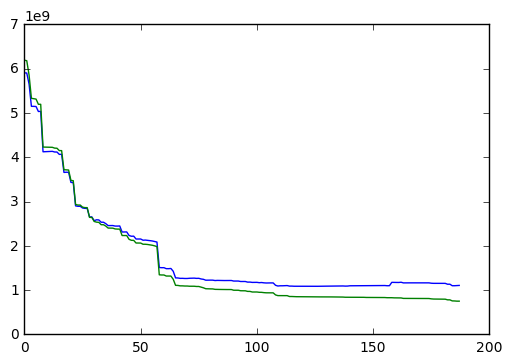

In [16]:
t = np.arange(0,b)
plt.plot(t,err[:,1])
plt.plot(t,err[:,0])
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0.99e9,1.05e9)
plt.show()